In [1]:
#Lib imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
plt.style.use('default')
import seaborn as sns
#sns.set_style('darkgrid')
#sns.set_palette('muted')
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import confusion_matrix
import sys, os, io, string, shutil, math
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA 
from sklearn import preprocessing
import scipy.linalg as la
import re
#from tabulate import tabulate
from scipy import stats
import pickle
from sklearn.utils import shuffle

tf.__version__


def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s
     
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    st = [ tryint(c) for c in re.split('([0-9]+)', s) ]
    #print(st)
    return st

def tryfloat(s):
    try:
        return float(s)
    except ValueError:
        return s

def alphanum_key_scientific(s):
    """ Turn a string into a list of string and number chunks.
        "P0.1MPa_sr1e7" -> [0.1, 10000000.0]
    """
    st = [ tryfloat(n) for n in re.findall("-?[\d.]+(?:e-?\d+)?", s)]
    #print(st)
    return st

#function for creating 3x3 matrix from 7 dims : distance_sqrd, xx_order, yy_order, zz_order, xy_order, yz_order, zx_order
def create_3_3_matrix(input_data):
    output = []
    for i in range(input_data.shape[0]):
        temp = np.array([[input_data[i][1],input_data[i][4],input_data[i][6],input_data[i][4],input_data[i][2],input_data[i][5],input_data[i][6],input_data[i][5],input_data[i][3]]])
        temp = np.reshape(temp, (-1,3,3))
        if i==0:
            output = temp
        else:
            output = np.append(output, temp, axis=0)
    return output

def print_eignvalues_for_a_pair(input_data, ylabel_text, pair_choise = 28):
  test = input_data[[i+pair_choise for i in range(0, input_data.shape[0], int(input_data.shape[0]/len(ylabel_text)))]]
  for i in range (len(ylabel_text)):
    data_for_eigen = create_3_3_matrix(test)
    print("Data for: ", ylabel_text[i])
    print("Distance sqd matrix: ")
    print(data_for_eigen[i])
    #The normalized (unit “length”) eigenvectors, 
    #such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
    u, V = la.eigh(data_for_eigen[i])
    #print(np.abs(np.dot(V,np.dot(np.diag(u), la.inv(V)))))
    print("Eigen values: ")
    print(u)
    print("Eigen vectors: ")
    print(V)
    cos_inv_vals = np.degrees(np.arccos(V))
    cos_inv_vals[cos_inv_vals > 90] = 180 - cos_inv_vals[cos_inv_vals > 90]
    print("Eigen vectors in degress: ")
    print(cos_inv_vals)
    print("------------------------------------------------")
    

### pair base study

def get_all_physical():
  pair_wanted_all_physical = ['1-3', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '7-9', '9-10', '10-11', '11-12', '12-13', '12-14', '14-15', '15-16', '16-17', '17-18', '18-19', '18-20', '20-21', '21-22', '22-23', '23-24', '23-25', '26-27', '27-28', '28-29', '28-30']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_all_pairs():
  pair_wanted_all_ = []
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
      if i<j:
        pair_wanted_all_.append(str(i)+"-"+str(j))
  return pair_wanted_all_


def get_far_apart_indexes(atom_distance = 10.0):
  pair_wanted_all_ = []
  pair_wanted_all_indx = []
  count=0
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
      if i<j:
        if abs(i-j) >= atom_distance:
          pair_wanted_all_.append(str(i)+"-"+str(j))
          pair_wanted_all_indx.append(count)
        count +=1
  return pair_wanted_all_, pair_wanted_all_indx


def get_far_apart_filter_indexes(atom_distance_low = 15.0, atom_distance_high = 30.0):
  if atom_distance_low>atom_distance_high:
    print("This is a band pass filter, low cant be higher than high")
    return

  pair_wanted_all_ = []
  pair_wanted_all_indx = []
  count=0
  for i in range(1, 31, 1):
    for j in range(1, 31, 1):
      if i<j:
        if abs(i-j) >= atom_distance_low and abs(i-j) <= atom_distance_high:
          pair_wanted_all_.append(str(i)+"-"+str(j))
          pair_wanted_all_indx.append(count)
        count +=1
  return pair_wanted_all_, pair_wanted_all_indx


def get_all_dihedral_indx():
  pair_wanted_all_dihedral = ['1-5', '3-5', '2-6']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['4-7']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['5-8']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['5-9']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['6-10']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['8-10']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['7-11']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['9-12']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['10-13']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['10-14']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['11-15']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['13-15']  
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['12-16']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['14-17'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['15-18']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['16-19'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['16-20']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['17-21']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['19-21']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['18-22']  
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['20-23']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['21-24'] 
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['21-25']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['22-26']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['24-26']   
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['23-27']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['25-28']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['26-29']
  pair_wanted_all_dihedral = pair_wanted_all_dihedral + ['26-30']
    
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_dihedral:
      pair_wanted_all_indx.append(i)   
  return pair_wanted_all_dihedral, pair_wanted_all_indx


def get_side_pairs():
  pair_wanted_all_physical = ['7-8', '12-13', '18-19', '23-24']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_end_pairs():
  pair_wanted_all_physical = ['1-3', '2-3', '28-29', '28-30']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_backbone_pairs():
  pair_wanted_all_physical = ['3-4', '11-12', '20-21', '27-28']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

def get_end_end_pairs():
  pair_wanted_all_physical = ['1-30', '1-29', '2-30', '2-29']
  pair_wanted_all_indx = []
  all_atompairs = get_all_pairs()
  for i,pair in enumerate(all_atompairs):
    if pair in pair_wanted_all_physical:
      pair_wanted_all_indx.append(i)
    
  return pair_wanted_all_physical, pair_wanted_all_indx

base_path= '../1000_files_new/'
with open(base_path+'data_dump_with_files.pk', 'rb') as handle:
    data_dump_new = pickle.load(handle)

arr_new, arr_time_series_new, files_dic_new, ylabel_new, ylabel_text_new, pairlabel_new  = data_dump_new

print(arr_new.shape)
print(ylabel_new.shape)
print(len(ylabel_text_new))
print(pairlabel_new.shape)
arr_time_series_new.keys()

base_path= '../1000_files/'
with open(base_path+'data_dump_with_files_first_1000.pk', 'rb') as handle:
    data_dump = pickle.load(handle)

arr, arr_time_series, files_dic, ylabel, ylabel_text, pairlabel  = data_dump

for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
    arr_time_series[key]=np.append((arr_time_series[key][:,:,0:4] - 1/3)*3/2, arr_time_series[key][:,:,4:]*3/2, axis=2)
    

print(arr.shape)
print(ylabel.shape)
print(len(ylabel_text))
print(pairlabel.shape)

arr_time_series_new_merged = {}
#arr, arr_time_series, files_dic, ylabel, ylabel_text, pairlabel
files_dic_merged = {}
for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
    if key in arr_time_series_new.keys():
        value = arr_time_series_new[key]
        print(key, value.shape)
        arr_time_series_new_merged[key]=value
        files_dic_merged[key]=files_dic_new[key]   
    else:
        arr_time_series_new_merged[key]=arr_time_series[key]
        files_dic_merged[key]=files_dic[key]
        
for key in sorted(arr_time_series_new.keys(), key=alphanum_key_scientific):
    if "sr0" in key:
        value = arr_time_series_new[key]
        print(key, value.shape)
        arr_time_series_new_merged[key]=value
        files_dic_merged[key]=files_dic_new[key] 
        
arr_time_series = arr_time_series_new_merged
files_dic = files_dic_merged


def get_strain_seperation_data_object(arr_time_series):
    
    generate_all_with_same_strain_sep = True
    #desired_strain_sep = 0.01
    
    filtered_arr_time_series = {}
    
    desired_strain_sep_list = {'sr1e6':0.001,'sr2e6':0.002,'sr1e7':0.01, 'sr2e7':0.02, 'sr1e8':0.01, 
                                 'sr2e8':0.01, 'sr1e9':0.01, 'sr2e9':0.01, 'sr1e10':0.01}
    
    selective_strain_sep_list = {'sr1e6':0.001,'sr2e6':0.002,'sr1e7':0.01, 'sr2e7':0.02, 'sr1e8':0.01, 
                                 'sr2e8':0.01, 'sr1e9':0.01, 'sr2e9':0.01, 'sr1e10':0.01}
    
    
    inclu_pressure_list = ['0.1', '100', '400', '636','875', '955']
    #inclu_pressure_list = ['400', '636','875', '955']
    #inclu_sr_list = ['sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
    inclu_sr_list = [ 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
    #inclu_sr_list = ['sr1e6','sr2e6','sr1e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']
    #inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
    #inclu_sr_list = ['sr1e6','sr1e7', 'sr2e7', 'sr1e8', 'sr1e9', 'sr1e10']
    #inclu_sr_list = ['sr1e6','sr2e6','sr1e7', 'sr2e7']
    #inclu_sr_list = ['sr1e6','sr1e7']
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in inclu_pressure_list and key.split('_')[1] in inclu_sr_list:
            value = np.array(files_dic[key])[::-1]
            value=value.astype(float)
            diff_files = value[:-1]-value[1:]
            diff_strain = diff_files * float(key.split('_')[1].split('sr')[1])/(10**15)
            #print(diff_strain)
            selective_diff = selective_strain_sep_list[key.split('_')[1]]
            desired_strain_sep = desired_strain_sep_list[key.split('_')[1]]
        
            data = arr_time_series[key]
                       
            selected_data_indexes = []
            #print(diff_strain)
            for i,diff_val in enumerate(diff_strain):
                if diff_val==selective_diff:
                    if not selected_data_indexes:
                        selected_data_indexes.append(i) 
                    if selected_data_indexes[-1]!=i:
                        selected_data_indexes.append(i)
                    if selected_data_indexes and selected_data_indexes[-1]!=(i+1):
                        selected_data_indexes.append(i+1)

            selected_data_indexes = np.array(selected_data_indexes)
            
            #print(key, data.shape[0]," orginal size with: ",selective_diff," strain sep:", selected_data_indexes.shape[0])
            
            if generate_all_with_same_strain_sep:
                reduce_factor = int(desired_strain_sep/selective_diff)
                #print(desired_strain_sep, selective_diff, reduce_factor)
                selected_data_indexes = selected_data_indexes[::reduce_factor]
                selective_diff = desired_strain_sep
            
            
            filtered_data = data[selected_data_indexes,:,:]
            print(key, data.shape[0]," filtered data size with: ",selective_diff," strain sep:", filtered_data.shape[0])
            filtered_arr_time_series[key] = filtered_data
        elif "sr0" in key:
            filtered_arr_time_series[key] = arr_time_series[key]
            
    
    return filtered_arr_time_series
    
filtered_arr_time_series = get_strain_seperation_data_object(arr_time_series = arr_time_series)

arr_time_series = filtered_arr_time_series

(15660, 7)
(15660,)
36
(15660, 4)
(104835, 7)
(104835,)
241
(104835, 4)
P0.1MPa_sr1e8 (1000, 435, 7)
P0.1MPa_sr2e8 (1000, 435, 7)
P0.1MPa_sr1e9 (1000, 435, 7)
P0.1MPa_sr2e9 (1000, 435, 7)
P0.1MPa_sr1e10 (1000, 435, 7)
P100MPa_sr1e8 (1000, 435, 7)
P100MPa_sr2e8 (1000, 435, 7)
P100MPa_sr1e9 (1000, 435, 7)
P100MPa_sr2e9 (1000, 435, 7)
P100MPa_sr1e10 (1000, 435, 7)
P400MPa_sr1e8 (1000, 435, 7)
P400MPa_sr2e8 (1000, 435, 7)
P400MPa_sr1e9 (1000, 435, 7)
P400MPa_sr2e9 (1000, 435, 7)
P400MPa_sr1e10 (1000, 435, 7)
P636MPa_sr1e8 (1000, 435, 7)
P636MPa_sr2e8 (1000, 435, 7)
P636MPa_sr1e9 (1000, 435, 7)
P636MPa_sr2e9 (1000, 435, 7)
P636MPa_sr1e10 (1000, 435, 7)
P875MPa_sr1e8 (1000, 435, 7)
P875MPa_sr2e8 (1000, 435, 7)
P875MPa_sr1e9 (1000, 435, 7)
P875MPa_sr2e9 (1000, 435, 7)
P875MPa_sr1e10 (1000, 435, 7)
P955MPa_sr1e8 (1000, 435, 7)
P955MPa_sr2e8 (1000, 435, 7)
P955MPa_sr1e9 (1000, 435, 7)
P955MPa_sr2e9 (1000, 435, 7)
P955MPa_sr1e10 (1000, 435, 7)
P0.1MPa_sr0 (1000, 435, 7)
P100MPa_sr0 (1000, 435, 7

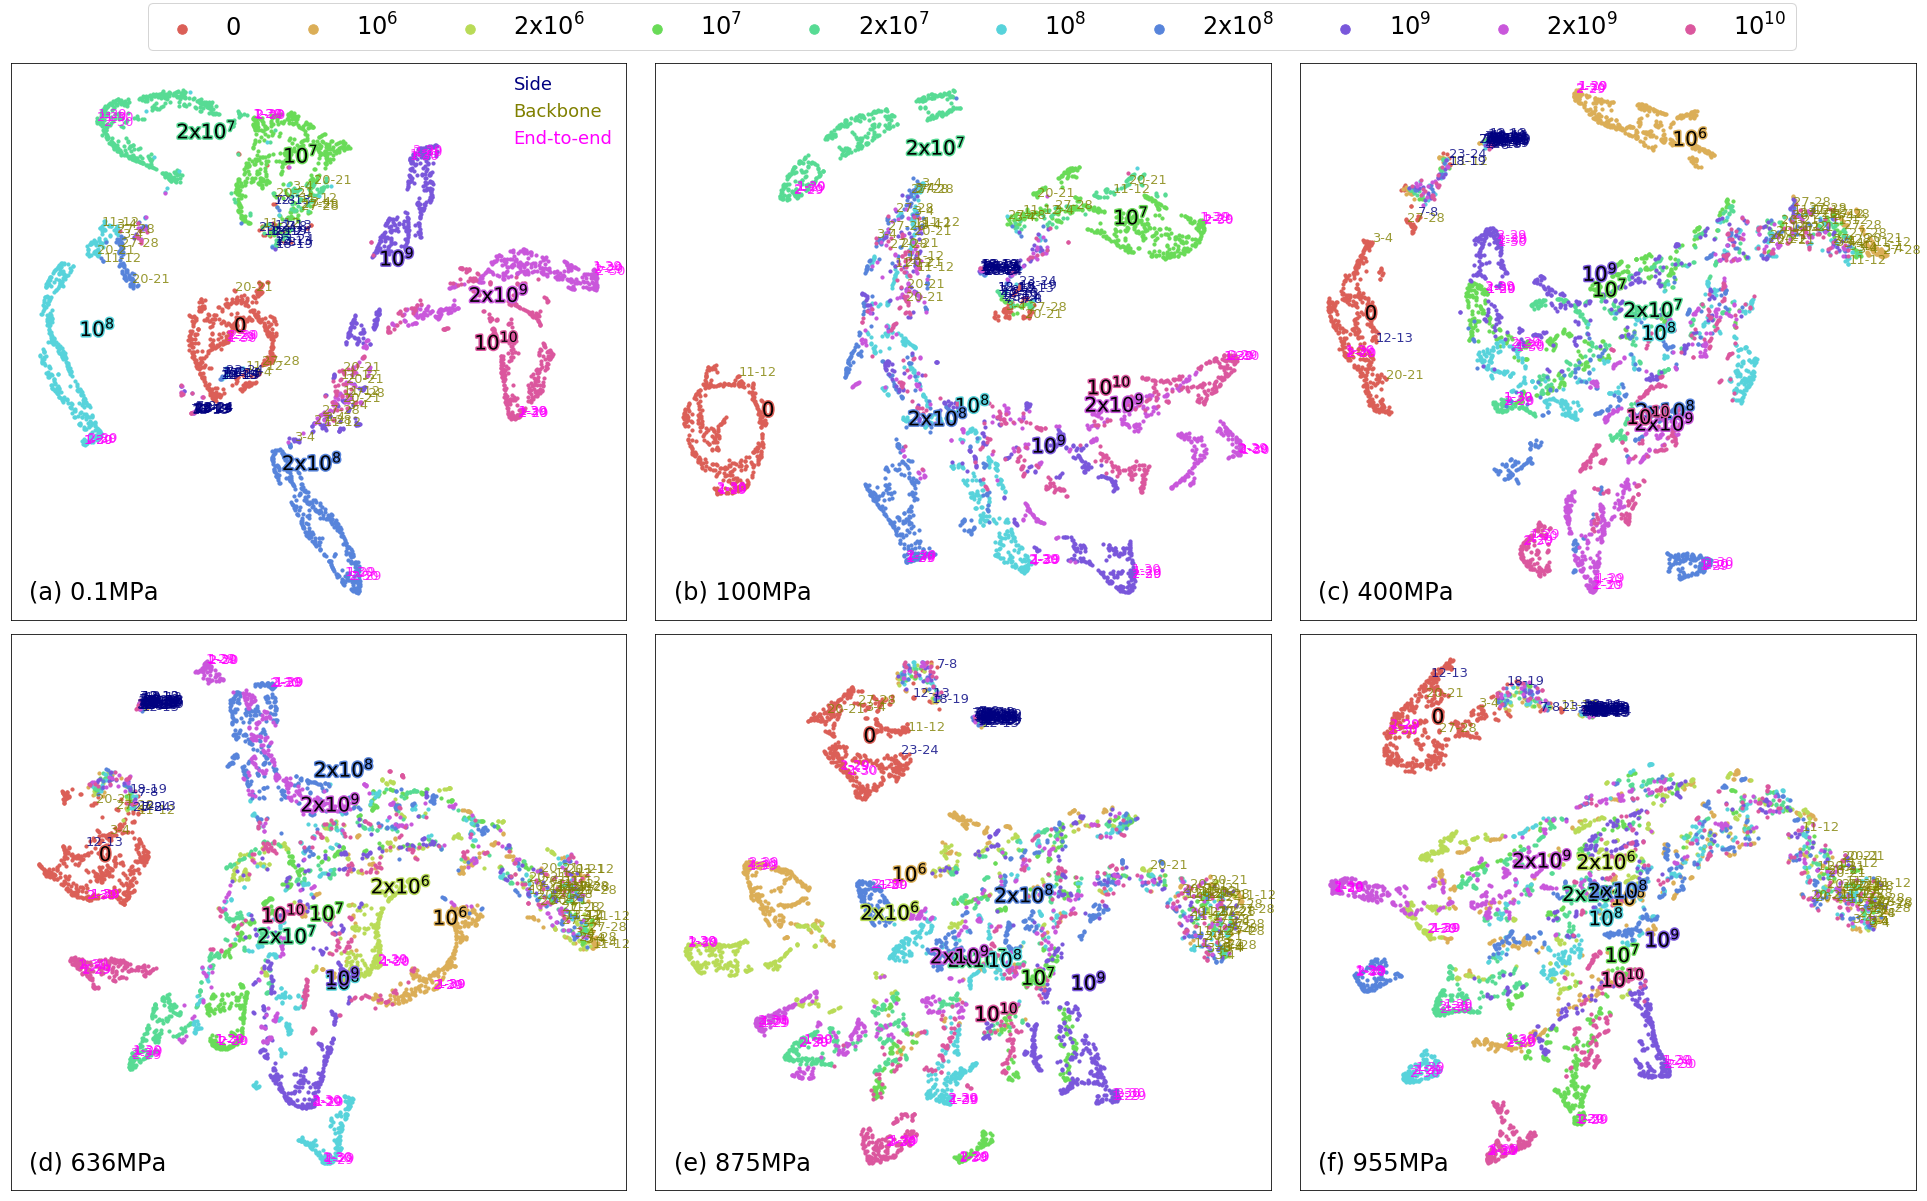

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

#Plot grid using dimension reduction

#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875', '955', '1200', '1600', '2000', '3000','6000']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1', '100', '200', '300', '400', '500', '636', '796', '875']
#pressure_list_ = ['0.1',  '796', '1200']
pressure_list_ = ['0.1', '100', '400', '636', '875', '955']
inclu_sr_list = ['sr1e6','sr1e7', 'sr1e8', 'sr1e9', 'sr1e10']
inclu_sr_list = ['sr0', 'sr1e6','sr2e6','sr1e7', 'sr2e7', 'sr1e8', 'sr2e8', 'sr1e9', 'sr2e9', 'sr1e10']

pair_colors = ['brown', 'navy', 'olive', 'magenta']
pair_colors = ['navy', 'limegreen', 'olive', 'magenta']
fontsize_axis_labels=16

#-------------------------------------------------------------------------------------------

def compute_angles_between_x_y_z_for_pc(components):
    angles = {}
    for pc, u in enumerate(components):
        
        vector_names = ['xx', 'yy', 'zz', 'xy', 'yz', 'zx']
        vectors = np.zeros((6, 6))
        np.fill_diagonal(vectors, 1.0)

        for i, v_name in enumerate(vector_names):
            xx = vectors[i,:]
            angle_cos = np.dot(u,xx)/np.linalg.norm(u)/np.linalg.norm(xx) # -> cosine of the angle
            angle_rad = np.arccos(np.clip(angle_cos, -1, 1)) # if you really want the angle
            angle_deg = np.degrees(angle_rad)

            angles['PC' +str(pc+1)+ "-"+v_name] = (angle_rad, angle_deg)
            
    angles = dict(sorted(angles.items(), key=lambda item: item[1]))
    
    print('Component', 'rad','deg')
    for key, val in angles.items():
        print(key, '-',val)
    
    return angles

def get_max_colors():
    # figuring out how many max colors would be there.
    total_colors=0
    name_list = {}
    color_list = {}
    color_list_formatted = {}
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        count=0
        if key.split('P')[1].split('M')[0] in pressure_list_ and key.split('_')[1] in inclu_sr_list:
            count += 1
            if key.split("_sr")[0] in name_list:
                name_list[key.split("_sr")[0]].append(key.split("_sr")[1])
            else:
                name_list[key.split("_sr")[0]]=[key.split("_sr")[1]]

    for value in name_list.values():
        if len(value)> total_colors:  
            total_colors = len(value)
            color_list = { val:i for i,val in enumerate(value)}
            color_list_formatted = { get_label_for_rate(val):i for i,val in enumerate(value)}
    
    return color_list, total_colors, color_list_formatted

def average_from_time_series_lasy_N_pair_filtered(arr_time_series, data_limit = 100, atom_distance = 10.0):
    ylabel_text_reduced = []
    ylabel_reduced = []
    pairlabel_reduced = []
    controlled_avg = []
    
    pair_wanted_all_, pair_wanted_all_indx = get_far_apart_indexes(atom_distance = atom_distance) # Distance based
    #pair_wanted_all_, pair_wanted_all_indx = get_all_dihedral_indx() # sepecial set 
    #print(pair_wanted_all_indx)
    pair_wanted_all_indx=np.array(pair_wanted_all_indx)
    
    for key in sorted(arr_time_series.keys(), key=alphanum_key_scientific):
        if key.split('P')[1].split('M')[0] in inclu_pressure_list and key.split('_')[1] in inclu_sr_list:
            ### Removing sr0 from high pressure plots
            #if key.split('_')[1] == 'sr0' and key.split('P')[1].split('M')[0] not in ['0.1', '100']:
            #    continue
            ylabel_text_reduced.append(key)
            value = arr_time_series[key]
            #print(value.shape)
            color_index = color_list[key.split("_sr")[1]]
            controlled_avg.append(np.mean(value[-data_limit:,pair_wanted_all_indx,:], axis=0))
            ylabel_reduced.append(np.full(shape=pair_wanted_all_indx.shape[0],fill_value=color_index,dtype=np.int))
            pairlabel_reduced.append(pairlabel[pair_wanted_all_indx,:])

    controlled_avg = np.reshape(np.array(controlled_avg), (-1,7))
    ylabel_reduced = np.array(ylabel_reduced).reshape(-1)
    pairlabel_reduced = np.array(pairlabel_reduced).reshape(-1,pairlabel.shape[1])
  
    return controlled_avg, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced

def get_label_for_rate(label):
    sr_label_pre = label.split('e')[0]
    sr_label_post = label.split('e')[-1]
    #print(label, sr_label_pre, sr_label_post)
    sr_label = ""
    if sr_label_pre != '1':
        sr_label= "$"+sr_label_pre+"$"
    if sr_label_post and sr_label_pre!=sr_label_post:
        if sr_label == "":
            sr_label += "$10^{"+sr_label_post+"}$"
        else:
            sr_label += "x$10^{"+sr_label_post+"}$" 
            
    return sr_label

def scatterPlot_axis(ax, x, colors, ylabel_text, pairlabel, titleText, total_colors):
    # choose a color palette with seaborn.
    num_classes = set(np.unique(colors))
    
    palette = np.array(sns.color_palette("hls", total_colors))
    #"Spectral", as_cmap=True, Spectral

    for i, label in enumerate(num_classes):
        ax.scatter(x[colors == label, 0], x[colors == label, 1], color=palette[label], label=str(get_label_for_rate(ylabel_text[i].split('sr')[-1])), s=10)
    
    #ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    
    #ax.set_title("", fontsize=24) 
    ax.text(0.03, 0.07, titleText, ha="left", va="top", size=24, transform = ax.transAxes) #, rotation=45, bbox=bbox_props 
    #ax.legend()
    #ax.axis('off')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.axis('tight')
    #ax.xaxis.set_tick_params(labelsize='x-large')
    #ax.yaxis.set_tick_params(labelsize='x-large')


    # add the labels for each digit corresponding to the label
    txts = []

    for i, label in enumerate(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.average(x[colors == label, :], axis=0)
        #txt = plt.text(xtext, ytext, str(ylabel_text[i].split('_')[1].split('sr')[1]), fontsize=20)
        txt = ax.text(xtext, ytext, str(get_label_for_rate(ylabel_text[i].split('sr')[-1])), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=3, foreground=palette[label]),
            PathEffects.Normal()])
        txts.append(txt)
        
    pair_wanted_side, pair_wanted_side_indx = get_side_pairs()
    pair_wanted_end, pair_wanted_end_indx = get_end_pairs()
    pair_wanted_backbone, pair_wanted_backbone_indx = get_backbone_pairs()
    pair_wanted_end_end, pair_wanted_end_end_indx = get_end_end_pairs()
    alpha=0.8
    fontsize_nums = 13
    for i in range(0,len(pairlabel),1):
        label__ = str(str(int(pairlabel[i,0])) + "-" + str(int(pairlabel[i,1])))
        if label__ in pair_wanted_side:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=fontsize_nums, color=pair_colors[0], alpha=alpha)
        #elif label__ in pair_wanted_end:
        #    txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=fontsize_nums, color=pair_colors[1], alpha=alpha)
        elif label__ in pair_wanted_backbone:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=fontsize_nums, color=pair_colors[2], alpha=alpha)
        elif label__ in pair_wanted_end_end:
            txt = ax.text(x[i, 0], x[i, 1],label__ , fontsize=fontsize_nums, color=pair_colors[3], alpha=alpha)
        
        #txt.set_path_effects([
        #    PathEffects.Stroke(linewidth=2.0, foreground=palette[colors[i]]),
        #    PathEffects.Normal()])
            
#-------------------------------------------------------------------------------------------
alpha_labels = ['(a)','(b)','(c)','(d)','(e)','(f)']
data_limit = 1000 
atom_distance = 0.0
N_COL=3
N_ROW = (len(pressure_list_)+N_COL-1)//N_COL
#fig, ax1 = plt.subplots()
fig, ax = plt.subplots(nrows=N_ROW, ncols=N_COL, figsize=(9*N_COL, 8*N_ROW))

color_list, total_colors, color_list_formatted = get_max_colors()
color_list_handles = copy.deepcopy(color_list_formatted)

for i, pressure in enumerate(pressure_list_):
    inclu_pressure_list = [pressure]
    
    arr_controlled, ylabel_text_reduced, ylabel_reduced, pairlabel_reduced = average_from_time_series_lasy_N_pair_filtered(arr_time_series=arr_time_series, data_limit = data_limit, atom_distance = atom_distance)
    # Here 2* SR is ignored as they are very near
    arr_selected = arr_controlled[:,1:] # only taking xx, yy,zz, ignoring xx^2+ yy^2+ zz^2
    ylabel_selected = ylabel_reduced
    ylabel_text_selected = ylabel_text_reduced
    pairlabel_selected = pairlabel_reduced
    sc = preprocessing.MinMaxScaler() # s the probably the most famous scaling algorithm, and follows the following formula for each feature:
    #sc = preprocessing.StandardScaler() # assumes your data is normally distributed within each feature
    #sc = preprocessing.RobustScaler() # interquartile range, so if there are outliers in the data, you might want to consider the Robust Scaler
    #sc = preprocessing.Normalizer() # The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.
    arr_transformed = sc.fit_transform(arr_selected)
    arr_transformed = arr_selected#sc.fit_transform(arr_selected)

    tsne = TSNE(n_components=2, random_state=0)#, perplexity=40, n_iter=2000)
    tSNEResult = tsne.fit_transform(arr_transformed)

    titleText = alpha_labels[i] +" "+ pressure+"MPa"
    
    index_i, index_j = i//N_COL, i%N_COL
    
    if N_ROW>1:
        scatterPlot_axis(ax[index_i,index_j], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
        
        for label_, handle in zip(ax[index_i,index_j].get_legend_handles_labels()[1], ax[index_i,index_j].get_legend_handles_labels()[0]):
            color_list_handles[label_]=handle
        
    else:
        scatterPlot_axis(ax[index_j], tSNEResult, ylabel_selected, ylabel_text_selected, pairlabel_selected, titleText, total_colors)
        
        #ax[index_j].legend()
        for label_, handle in zip(ax[index_j].get_legend_handles_labels()[1], ax[index_j].get_legend_handles_labels()[0]):
            color_list_handles[label_]=handle


fig.legend(list(color_list_handles.values()), list(color_list_handles.keys()),ncol=len(color_list_handles.keys()), fontsize=24, markerscale=3, bbox_to_anchor=(0.5, 1.05), loc='upper center') #loc='upper center', bbox_to_anchor=(0.5,0.85)
markersize_ = 10
legend_elements = [Line2D([0], [0], linestyle="None", marker='None', color=pair_colors[0], label='Side', markerfacecolor=pair_colors[0]),
                   #Line2D([0], [0], linestyle="None",marker='o', color=pair_colors[1],label='End', markerfacecolor=pair_colors[1]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[2],label='Backbone', markerfacecolor=pair_colors[2]),
                   Line2D([0], [0], linestyle="None",marker='None', color=pair_colors[3],label='End-to-end', markerfacecolor=pair_colors[3])
                  ]

legend2 = fig.legend(ncol=1, fontsize=18, markerscale=2, bbox_to_anchor=(0.23, 0.9), loc='lower left', frameon=False, handles=legend_elements) #loc='upper center', bbox_to_anchor=(0.5,0.85)

for line, text in zip(legend2.get_lines(), legend2.get_texts()):
    text.set_color(line.get_color())

fig.tight_layout()